In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# open up the swe data 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")
aso_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20190407_latlon.nc")

# open up hte snow depth data 
aso_sd_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20180330_latlon.nc")
aso_sd_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20190407_latlon.nc")


# open up the model data 
mp08_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Thompson.nc")
mp10_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Morrison.nc")
mp55_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Ishmael.nc")

mp08_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Thompson.nc")
mp10_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Morrison.nc")
mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Ishmael.nc")



# geog file 
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")
east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)
other_mask = geog.OTHR_MASK.where(geog.OTHR_MASK >0)

In [3]:
mp08_lsmout_2018 = xr.open_dataset(mp08_run)
mp10_lsmout_2018 = xr.open_dataset(mp10_run)
mp55_lsmout_2018 = xr.open_dataset(mp55_run)

mp08_lsmout_2019 = xr.open_dataset(mp08_run19)
mp10_lsmout_2019 = xr.open_dataset(mp10_run19)
mp55_lsmout_2019 = xr.open_dataset(mp55_run19)




In [4]:
# open up all of the swe data ... 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")

swe1=xr.open_dataset(aso_dat1)
swe2=xr.open_dataset(aso_dat2)

sd1=xr.open_dataset(aso_sd_dat1).Band1
sd2=xr.open_dataset(aso_sd_dat2).Band1

# get just the swe in mm 
swevar1 = swe1.where(swe1>0).Band1*1000
swevar2 = swe2.where(swe2>0).Band1*1000

# get the density ...
dens1 = swevar1/sd1
dens2 = swevar2/sd2


# use the thompson density 
mask18 = swevar1.where(swevar1 > 0, np.nan)
mask18 = mask18/mask18
mask18 = (mask18 * other_mask)

## COMPTUE THE NOAH MP DENSITY 
## THE DIFFERENT MP RUNS ARE +/- 10 Percent 
d1 = pd.to_datetime("2018-03-31")
d2 = pd.to_datetime("2019-04-07")
morr_dens_18 = ((mp55_lsmout_2018.SNEQV/1000. / mp55_lsmout_2018.SNOWH).sel(time=d1))
morr_dens_19 = ((mp55_lsmout_2019.SNEQV/1000. / mp55_lsmout_2019.SNOWH).sel(time=d2))


## COMPUET THE NEW ASO SWE
# recompute the aso swe...
aso_swe_corr18 = (sd1 * morr_dens_18 ) * 1000.
aso_swe_corr19 = (sd2 * morr_dens_19 ) * 1000.

aso_sd_corr18 = sd1
aso_sd_corr19 = sd2


In [5]:
# swe 
mp08_swe_2018 =  mp08_lsmout_2018.SNEQV.sel(time=d1)*mask18
mp10_swe_2018 =  mp10_lsmout_2018.SNEQV.sel(time=d1)*mask18
mp55_swe_2018 =  mp55_lsmout_2018.SNEQV.sel(time=d1)*mask18
mp08_swe_2019 =  mp08_lsmout_2019.SNEQV.sel(time=d2)*mask18
mp10_swe_2019 =  mp10_lsmout_2019.SNEQV.sel(time=d2)*mask18
mp55_swe_2019 =  mp55_lsmout_2019.SNEQV.sel(time=d2)*mask18

# sd 
mp08_sd_2018 =  mp08_lsmout_2018.SNOWH.sel(time=d1)*mask18
mp10_sd_2018 =  mp10_lsmout_2018.SNOWH.sel(time=d1)*mask18
mp55_sd_2018 =  mp55_lsmout_2018.SNOWH.sel(time=d1)*mask18
mp08_sd_2019 =  mp08_lsmout_2019.SNOWH.sel(time=d2)*mask18
mp10_sd_2019 =  mp10_lsmout_2019.SNOWH.sel(time=d2)*mask18
mp55_sd_2019 =  mp55_lsmout_2019.SNOWH.sel(time=d2)*mask18

# melt 
mp08_melt_2018 =  mp08_lsmout_2018.ACSNOM.sel(time=d1)*mask18
mp10_melt_2018 =  mp10_lsmout_2018.ACSNOM.sel(time=d1)*mask18
mp55_melt_2018 =  mp55_lsmout_2018.ACSNOM.sel(time=d1)*mask18
mp08_melt_2019 =  mp08_lsmout_2019.ACSNOM.sel(time=d2)*mask18
mp10_melt_2019 =  mp10_lsmout_2019.ACSNOM.sel(time=d2)*mask18
mp55_melt_2019 =  mp55_lsmout_2019.ACSNOM.sel(time=d2)*mask18

In [8]:
hgt_flat  = geog.HGT_M.isel(Time=0)#.mean()
hgt_flat  = hgt_flat.where(aso_swe_corr18>0).values.flatten()
hgtarg    = hgt_flat.argsort()

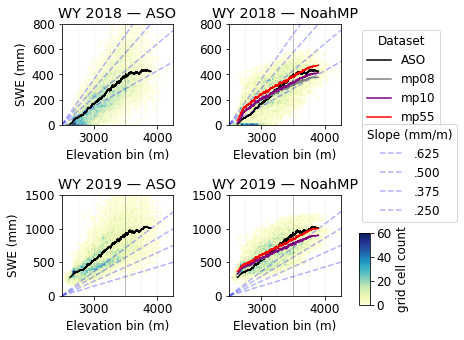

In [14]:
from scipy import stats 
import matplotlib as mpl
font = {'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)



fig, ax = plt.subplots(2,2)
fig.set_size_inches(5,5)

# make linear regressions 
def linregress(x,y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    return slope, intercept 

names = ["aso", "mp8", "mp10", "mp55" ]
#datavars = [aso_swe_corr19, mp08_swe_2019, mp10_swe_2019, mp55_swe_2019]

datavars = [sd1,  mp08_sd_2019, mp10_sd_2019, mp55_sd_2019]
# meltvars = [None, mp8_snom, mp10_snom, mp55_snom]


df18 = pd.DataFrame({"hgt":  hgt_flat[hgtarg], 
                   "aso18":  aso_swe_corr18.values.flatten()[hgtarg], 
                   "mp08_sd_2018":mp08_swe_2018.values.flatten()[hgtarg], 
                   "mp10_sd_2018":mp10_swe_2018.values.flatten()[hgtarg], 
                   "mp55_sd_2018":mp55_swe_2018.values.flatten()[hgtarg],
                   "mp08_melt_2018":mp08_melt_2018.values.flatten()[hgtarg],
                   "mp10_melt_2018":mp10_melt_2018.values.flatten()[hgtarg],
                   "mp55_melt_2018":mp55_melt_2018.values.flatten()[hgtarg]})
                    
                    
df19 = pd.DataFrame({"hgt":  hgt_flat[hgtarg], 
                     "aso19":  aso_swe_corr19.values.flatten()[hgtarg], 
                     "mp08_sd_2019":mp08_swe_2019.values.flatten()[hgtarg], 
                     "mp10_sd_2019":mp10_swe_2019.values.flatten()[hgtarg], 
                     "mp55_sd_2019":mp55_swe_2019.values.flatten()[hgtarg],
                     "mp08_melt_2019":mp08_melt_2019.values.flatten()[hgtarg],
                     "mp10_melt_2019":mp10_melt_2019.values.flatten()[hgtarg],
                     "mp55_melt_2019":mp55_melt_2019.values.flatten()[hgtarg]})
                  
# remove gthe nan values. these are b/c of the mask layer which has nans. we don't want to look at those
# points 
df18 = df18.dropna()
df19 = df19.dropna() 

hxcmp = 'YlGnBu'

# PLOT WY2018
cb = ax[0,0].hexbin(df18.hgt,  df18.aso18, bins=60, mincnt=1, vmax=30, zorder=0, cmap=hxcmp, alpha=.4)
df18roll = df18.rolling(400).mean()
# now plot some lines..
ax[0,0].plot(df18roll.hgt, df18roll.aso18,  zorder=0, color='black', label="ASO")
ax[0,1].plot(df18roll.hgt, df18roll.aso18,  zorder=0, color='black', label="ASO")
#ax[1,0].plot(df18roll.hgt, df18roll.aso18+240.,  zorder=0, color='black', linestyle=':')

ax[0,1].plot(df18roll.hgt, df18roll['mp08_sd_2018'], color='gray'  , label="mp08")
ax[0,1].plot(df18roll.hgt, df18roll['mp10_sd_2018'], color='purple', label="mp10")
ax[0,1].plot(df18roll.hgt, df18roll['mp55_sd_2018'], color='red'   , label="mp55")

# make a plot of the whole model population in the 2nd one ...
ax[0,1].hexbin(df18.hgt, df18.iloc[:,2:-3].mean(axis=1), bins=60, mincnt=1, vmax=30, zorder=0, cmap=hxcmp, alpha=1)

## MAKE SOME BARS OF THE MELT...
# ax01t = plt.twinx(ax[0,1])
# ax01t.plot(df18roll.hgt, df18roll['mp08_melt_2018'],linewidth=.5,color='gray')
# ax01t.plot(df18roll.hgt, df18roll['mp10_melt_2018'],linewidth=.5,color='purple')
# ax01t.plot(df18roll.hgt, df18roll['mp55_melt_2018'],linewidth=.5,color='red')
# ax01t.set_ylim(-400, 150)
# ax01t.set_yticks([0,  50, 100])
# ax01t.text(4400, 50, "Snow \n Melt (mm)", rotation=0)
# ax01t.axhline(0, linewidth=.1, alpha=.2)


# PLOT WY 2019
cb = ax[1,0].hexbin(df19.hgt, df19.aso19,  bins=60, mincnt=1, vmax=60, zorder=0, cmap=hxcmp, alpha=1)
df19roll = df19.rolling(400).mean()
ax[1,0].plot(df19roll.hgt, df19roll.aso19, zorder=0, color='black', label="ASO")
ax[1,1].plot(df19roll.hgt, df19roll.aso19, zorder=0, color='black', label="ASO")
ax[1,1].plot(df19roll.hgt, df19roll['mp08_sd_2019'], color='gray',   label="mp08")
ax[1,1].plot(df19roll.hgt, df19roll['mp10_sd_2019'], color='purple', label="mp10")
ax[1,1].plot(df19roll.hgt, df19roll['mp55_sd_2019'], color='red',    label="mp55")

# hexbin for naoth mp 2019 
cb = ax[1,1].hexbin(df19.hgt, df19.iloc[:,2:-3].mean(axis=1), bins=60, mincnt=1, vmax=60, zorder=0, cmap=hxcmp, alpha=1)

## MAKE SOME BARS OF THE MELT...
# ax11t = plt.twinx(ax[1,1])
# ax11t.plot(df19roll.hgt, df19roll['mp08_melt_2019'], linewidth=.5,color='gray')
# ax11t.plot(df19roll.hgt, df19roll['mp10_melt_2019'], linewidth=.5,color='purple')
# ax11t.plot(df19roll.hgt, df19roll['mp55_melt_2019'], linewidth=.5,color='red')
# ax11t.set_ylim(-400, 150)
# ax11t.set_yticks([0,  50, 100])
# ax11t.text(4400, 50, "Snow \n Melt (mm)", rotation=0)
# ax11t.axhline(0, linewidth=.1, alpha=.2)

for axx in ax.flatten():
    axx.set_xlim(2500,4250)
    for xl in np.arange(2500, 4500, 250):
        axx.axvline(xl, linewidth=.5, alpha=.2, color='black', linestyle=':', zorder=0)
    axx.axvline(3500, linewidth=.75, alpha=.3, color='black')
    axx.set_xlabel("Elevation bin (m)")

ax[0,1].legend(bbox_to_anchor=(1.14,1), loc="upper left",  title="Dataset")

def line(m,x,b):
    return m*x + b

for i in [0,1]:
    ax[1,i].plot([2500, 6000], [0, 2500], zorder=0, color='blue', linestyle='--', alpha=.3, label='.625')
    ax[1,i].plot([2500, 6000], [0, 2000], zorder=0, color='blue', linestyle='--', alpha=.3, label='.500')
    ax[1,i].plot([2500, 6000], [0, 1500], zorder=0, color='blue', linestyle='--', alpha=.3, label='.375')
    ax[1,i].plot([2500, 6000], [0, 1000], zorder=0, color='blue', linestyle='--', alpha=.3, label='.250')

for i in [0,1]:
    ax[0,i].plot([2500, 6000], [0, 2500], zorder=0, color='blue', linestyle='--', alpha=.3, label='.625')
    ax[0,i].plot([2500, 6000], [0, 2000], zorder=0, color='blue', linestyle='--', alpha=.3, label='.500')
    ax[0,i].plot([2500, 6000], [0, 1500], zorder=0, color='blue', linestyle='--', alpha=.3, label='.375')
    ax[0,i].plot([2500, 6000], [0, 1000], zorder=0, color='blue', linestyle='--', alpha=.3, label='.250')
    # rise = 3000 - 0
    # run =  4000

handles, labels = ax[1,1].get_legend_handles_labels()
ax[1,1].legend(handles[4:], labels[4:], bbox_to_anchor=(1.14,1.77), loc="upper left", title="Slope (mm/m)")

ax[0,0].set_ylim(0,800)
ax[0,1].set_ylim(0,800)
ax[1,0].set_ylim(0,1500)
ax[1,1].set_ylim(0,1500)


ax[0,0].set_ylabel("SWE (mm)")
ax[1,0].set_ylabel("SWE (mm)")

ax[0,0].set_title("WY 2018 {} ASO".format(u"\u2014"))
ax[0,1].set_title("WY 2018 {} NoahMP".format(u"\u2014"))

ax[1,0].set_title("WY 2019 {} ASO".format(u"\u2014"))
ax[1,1].set_title("WY 2019 {} NoahMP".format(u"\u2014"))


cbax = fig.add_axes([.95,.1,.03,.2])
cbar = fig.colorbar(cb, cax=cbax)
cbar.set_label("grid cell count")
fig.subplots_adjust(hspace=.7, wspace=.5)
plt.savefig("SWE_Elevation", dpi=600, facecolor='white',  bbox_inches = "tight")


In [66]:
df18

,hgt,aso18,mp08_sd_2018,mp10_sd_2018,mp55_sd_2018,mp08_melt_2018,mp10_melt_2018,mp55_melt_2018
51,2543.365479,0.011078,0.0263,0.0000,0.0284,75.949998,78.929998,73.589998
59,2546.535400,0.009988,0.0298,0.0000,0.0300,76.659998,86.139998,73.849998
64,2547.960205,0.006408,0.0340,0.0000,0.0321,77.429998,89.039998,76.029998
77,2551.789795,0.002408,0.0366,0.0000,0.0345,80.169998,90.809998,78.839998
84,2554.119385,0.001267,0.0349,0.0000,0.0339,78.759998,88.839998,91.049998
...,...,...,...,...,...,...,...,...
23309,4169.016113,1.544455,1.0245,1.3788,1.6000,38.929999,42.869999,38.429999
23311,4206.923340,1.876139,1.0826,1.4198,1.6422,31.989999,32.979999,37.429999
23313,4218.899414,1.181975,1.0184,1.3827,1.6043,39.659999,36.419999,38.419999
23314,4252.013184,1.880542,1.1096,1.4596,1.6759,28.929999,28.889999,35.669999


,hgt,aso18,mp08_sd_2018,mp10_sd_2018,mp55_sd_2018,mp08_melt_2018,mp10_melt_2018,mp55_melt_2018
0,3147.822754,300.826774,190.600003,238.300004,276.700004,11.150000,14.900000,15.180000
1,3147.822754,79.937216,30.000000,38.700001,100.500001,119.229997,133.149997,108.219998
2,3147.822754,56.400745,18.800000,32.800000,14.400000,129.589997,133.869997,178.459996
3,3147.822754,44.131210,30.700000,39.800001,27.900000,118.989997,126.449997,165.699996
4,3147.822754,44.599530,78.700001,99.100001,151.300002,81.019998,85.699998,64.999999
...,...,...,...,...,...,...,...,...
23302,3147.822754,669.021821,338.800005,465.100007,538.600008,28.859999,24.539999,27.149999
23304,3147.822754,509.681078,265.500004,372.200006,422.200006,89.199998,99.439998,126.459997
23308,3147.822754,15.404346,57.700001,78.800001,110.700002,45.599999,48.299999,47.129999
23309,3147.822754,40.276762,60.100001,81.800001,110.900002,41.689999,45.029999,45.099999


In [52]:
# y_interp = scipy.interpolate.interp1d(df.pressure.values,
#                                       df[col],
#                                       bounds_error=False,
#                                       fill_value="extrapolate")

# interped = y_interp(new_pressure)
# df_out[col] = interped

In [1]:
# hgt = geog.HGT_M.isel(Time=0)#.values.flatten()
# fig,ax = plt.subplots(1,3)
# fig.set_size_inches(12,5)

# weloc = slice(30,70)
# nsloc = slice(80,120)

# # plot aso
# swevar2.isel(south_north = nsloc,
#              west_east   = weloc).plot(ax=ax[0], vmin=200, vmax=1200)

# hgtcnt = ax[0].contour(hgt.isel(south_north = nsloc, 
#                                 west_east   = weloc),
#                        colors='white')

# # plot noahmp
# mp08_swe_2019.isel(south_north = nsloc, 
#                    west_east   = weloc).plot(ax=ax[1], vmin=200, vmax=1200)

# swevar2.isel(south_north = nsloc,
#              west_east   = weloc)
             

# # plot the difference ... 


# hgtcnt = ax[1].contour(hgt.isel(south_north = nsloc, 
#                                 west_east   = weloc,), colors='white')


# ax[0].clabel(hgtcnt, hgtcnt.levels, inline=True, fontsize=5)
# ax[1].clabel(hgtcnt, hgtcnt.levels, inline=True, fontsize=5)


In [ ]:
from scipy import stats 
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,4)


hgtarg = hgt_flat.argsort()

# ax[0].hexbin(hgt_flat[hgtarg], swevar1.values.flatten()[hgtarg], bins=60, mincnt=1, vmax=30)
# ax[1].hexbin(hgt_flat[hgtarg], mp8_swe.values.flatten()[hgtarg], bins=60, mincnt=1, vmax=30)
# ax[2].hexbin(hgt_flat[hgtarg], mp10_swe.values.flatten()[hgtarg], bins=60, mincnt=1, vmax=30)
# ax[3].hexbin(hgt_flat[hgtarg], mp55_swe.values.flatten()[hgtarg], bins=60, mincnt=1, vmax=30)

# make linear regressions 
def linregress(x,y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    return slope, intercept 

ref = swevar1.values.flatten()[hgtarg]

datavars = [mp8_swe, mp10_swe, mp55_swe]
for i,axx in enumerate(ax.flatten()):
    #axx.set_ylim(-800, 800)
    axx.set_title(names[i])
    axx.set_xlabel("height (m))")

    axx.hexbin(hgt_flat[hgtarg], datavars[i].values.flatten()[hgtarg] - ref, bins=200, mincnt=1)# vmax=30)

    slope, intercept = linregress(hgt_flat[hgtarg], datavars[i].values.flatten())
#    axx.plot(hgt_flat[hgtarg], hgt_flat[hgtarg]*slope + intercept, color='grey')
    
    
ax[0].set_ylabel("SWE (mm)")

fig.suptitle("NoahMP SWE - ASO w.r.t Elevation")


cbax = fig.add_axes([.91, .125, .015, .74])
fig.colorbar(cb, cax=cbax)
fig.subplots_adjust(wspace=.25)

In [ ]:
angles = np.pi*bins/180
ax = plt.subplot(111, polar=True)
ax.set_ylim(0,5)
bars = ax.bar(x=(angles[0:-1] + np.diff(angles)/2), 
              height=values/np.sum(values)*100, 
              linewidth=2,
              width = np.diff(angles)[0])

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(24,12)
aspect_mask = (geog.aspect * east_mask).isel(Time=0).plot(ax=ax[0], cmap="twilight_shifted")
(geog.HGT_M.isel(Time=0)*east_mask).plot(ax=ax[1])

In [ ]:
swev1_asp = swevar1.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp10_asp = mp10_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp8_asp  = mp8_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp55_asp = mp55_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]

swev1max = swev1_asp[~np.isnan(swev1_asp)].max()


amgs = aspect_mask.argsort()
x = aspect_mask[amgs]
def mask_both(x,y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    return x[mask], y[mask]


fig,ax = plt.subplots(1,4)
fig.set_size_inches(15,6)

dlist = [swev1_asp, mp10_asp, mp8_asp, mp55_asp]
for i,axx in enumerate(ax.flatten()):
    xx, yy = mask_both(x, dlist[i][amgs])
    axx.plot(xx, yy, alpha=.5)
    rolling_10 = pd.DataFrame(yy).rolling(40).median()
    axx.plot(xx, rolling_10.values, color='yellow', label="40 grid-cell rolling median")
    axx.set_ylim(0,1400)
    if i == 3:
        axx.legend()
    
    
#ax[0].plot(x, swev1_asp[amgs])
#ax[1].plot(x, mp8_asp  [amgs])
#ax[2].plot(x, mp10_asp [amgs])
#ax[3].plot(x, mp55_asp [amgs])


names = ["aso", "mp8", "mp10", "mp55"]
for i,axx in enumerate(ax.flatten()):
#    axx.set_ylim(0,1200)
    axx.set_title(names[i])
    axx.set_xlabel("aspect (degrees))")
    
ax[0].set_ylabel("SWE Storage")

#for axx in ax.flatten():
#    axx.set_ylim(0,1500)

In [ ]:
swev1_asp = swevar1.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp10_asp = mp10_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp8_asp  = mp8_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]
mp55_asp = mp55_swe.values[0,:,:][~np.isnan((geog.aspect * east_mask).isel(Time=0).values)]


swev1max = swev1_asp[~np.isnan(swev1_asp)].max()



fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,6)
#ax[0].plot(aspect_mask[aspect_mask.argsort()], swev1_asp[aspect_mask.argsort()])
ax[0].plot(aspect_mask[aspect_mask.argsort()], mp8_asp[aspect_mask.argsort()]  - swev1_asp[aspect_mask.argsort()])
ax[1].plot(aspect_mask[aspect_mask.argsort()], mp10_asp[aspect_mask.argsort()] - swev1_asp[aspect_mask.argsort()])
ax[2].plot(aspect_mask[aspect_mask.argsort()], mp55_asp[aspect_mask.argsort()] - swev1_asp[aspect_mask.argsort()])


names = ["mp8", "mp10", "mp55"]
for i,axx in enumerate(ax.flatten()):
#    axx.set_ylim(0,1200)
    axx.set_title(names[i])
    axx.set_xlabel("aspect (degrees))")
    axx.set_ylim(-1000, 1000)
ax[0].set_ylabel("Bias ")
fig.suptitle("NoahMP SWE - ASO")
#for axx in ax.flatten():
#    axx.set_ylim(0,1500)